
Script to Explore SVMs

Simple script to explore SVM training with varying C

Example adapted from scikit_learn documentation by Eric Eaton, 2014


Training the SVM
Testing the SVM


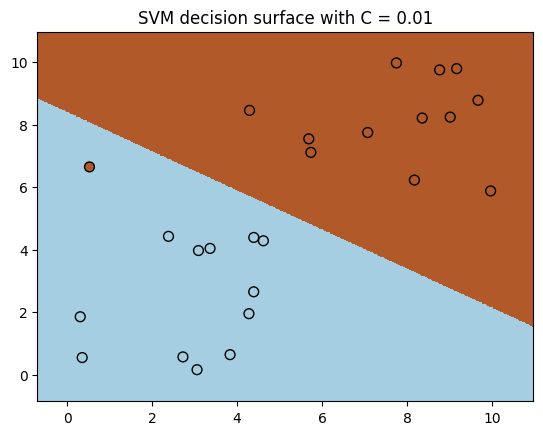

In [7]:
"""
======================
Script to Explore SVMs
======================

Simple script to explore SVM training with varying C

Example adapted from scikit_learn documentation by Eric Eaton, 2014

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


# load the data
filename = 'data/svmData.dat'
allData = np.loadtxt(filename, delimiter=',')

X = allData[:,:-1]
Y = allData[:,-1]


C = 0.01

# train the SVM
print ("Training the SVM")
clf = svm.SVC(C=C,kernel='linear')
clf.fit(X, Y)

print ("Testing the SVM")

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, s=50, edgecolors='k')

plt.title('SVM decision surface with C = '+str(C))
plt.axis('tight')
plt.show()


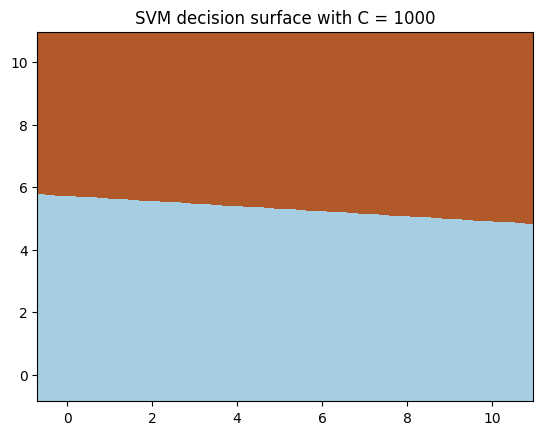

In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Load the data
filename = 'data/svmData.dat'
allData = np.loadtxt(filename, delimiter=',')
X = allData[:, :-1]
Y = allData[:, -1]

# Set C value
C = 1000

# Train the SVM
clf = svm.SVC(C=C, kernel='linear')
clf.fit(X, Y)

# Test the SVM
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the decision boundary
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('SVM decision surface with C = ' + str(C))
plt.axis('tight')
plt.show()



SVM with custom kernel

Simple usage of Support Vector Machines to classify a sample. It will
plot the decision surface and the support vectors.

Example adapted from scikit_learn documentation.


Training the SVM
Size X1 =  (150, 2)
Size X2 =  (150, 2)

Testing the SVM
Size X1 =  (61600, 2)
Size X2 =  (150, 2)


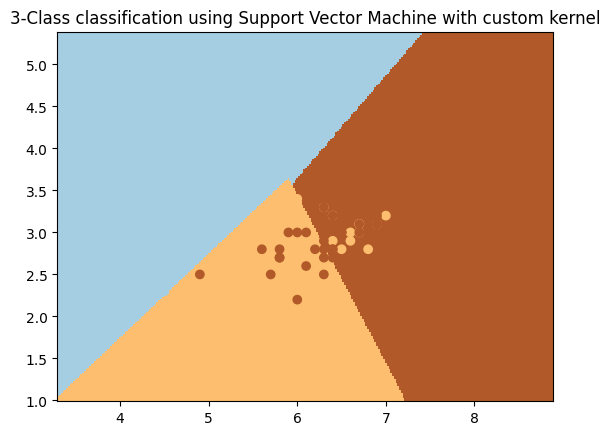

In [8]:
"""
======================
SVM with custom kernel
======================

Simple usage of Support Vector Machines to classify a sample. It will
plot the decision surface and the support vectors.

Example adapted from scikit_learn documentation.

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target


def myCustomKernel(X1, X2):
    """
    Custom kernel:
    k(X1, X2) = X1  (3  0) X2.T
                    (0  2)
    """
    print("Size X1 = ", X1.shape)
    print("Size X2 = ", X2.shape)
    M = np.matrix([[3.0, 0], [0, 2.0]])
    return np.dot(np.dot(X1, M), X2.T)


h = .02  # step size in the mesh

# we create an instance of SVM with the custom kernel and train it
print("Training the SVM")
clf = svm.SVC(kernel=myCustomKernel)
clf.fit(X, Y)

print("")
print("Testing the SVM")

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('3-Class classification using Support Vector Machine with custom kernel')
plt.axis('tight')
plt.show()


In [9]:
import numpy as np

_polyDegree = 2
_gaussSigma = 1


def myPolynomialKernel(X1, X2):
    '''
        Arguments:
            X1 - an n1-by-d numpy array of instances
            X2 - an n2-by-d numpy array of instances
        Returns:
            An n1-by-n2 numpy array representing the Kernel (Gram) matrix
    '''
    return np.power(np.dot(X1, X2.T) + 1, _polyDegree)


def myGaussianKernel(X1, X2):
    '''
        Arguments:
            X1 - an n1-by-d numpy array of instances
            X2 - an n2-by-d numpy array of instances
        Returns:
            An n1-by-n2 numpy array representing the Kernel (Gram) matrix
    '''
    n1, d = X1.shape
    n2, _ = X2.shape

    K = np.zeros((n1, n2))

    for i in range(n1):
        for j in range(n2):
            diff = X1[i] - X2[j]
            K[i, j] = np.exp(-np.dot(diff, diff) / (2 * _gaussSigma**2))

    return K


def myCosineSimilarityKernel(X1, X2):
    '''
        Arguments:
            X1 - an n1-by-d numpy array of instances
            X2 - an n2-by-d numpy array of instances
        Returns:
            An n1-by-n2 numpy array representing the Kernel (Gram) matrix
    '''
    norm_X1 = np.linalg.norm(X1, axis=1, keepdims=True)
    norm_X2 = np.linalg.norm(X2, axis=1, keepdims=True)
    dot_product = np.dot(X1, X2.T)
    return dot_product / (norm_X1.dot(norm_X2.T))  # Normalize by magnitudes (CIS 519 ONLY)


Training the SVM with C=0.1 and d=2
Training the SVM with C=0.1 and d=3
Training the SVM with C=0.1 and d=4
Training the SVM with C=0.1 and d=5
Training the SVM with C=1 and d=2
Training the SVM with C=1 and d=3
Training the SVM with C=1 and d=4
Training the SVM with C=1 and d=5
Training the SVM with C=10 and d=2
Training the SVM with C=10 and d=3
Training the SVM with C=10 and d=4
Training the SVM with C=10 and d=5
Training the SVM with C=100 and d=2
Training the SVM with C=100 and d=3
Training the SVM with C=100 and d=4
Training the SVM with C=100 and d=5


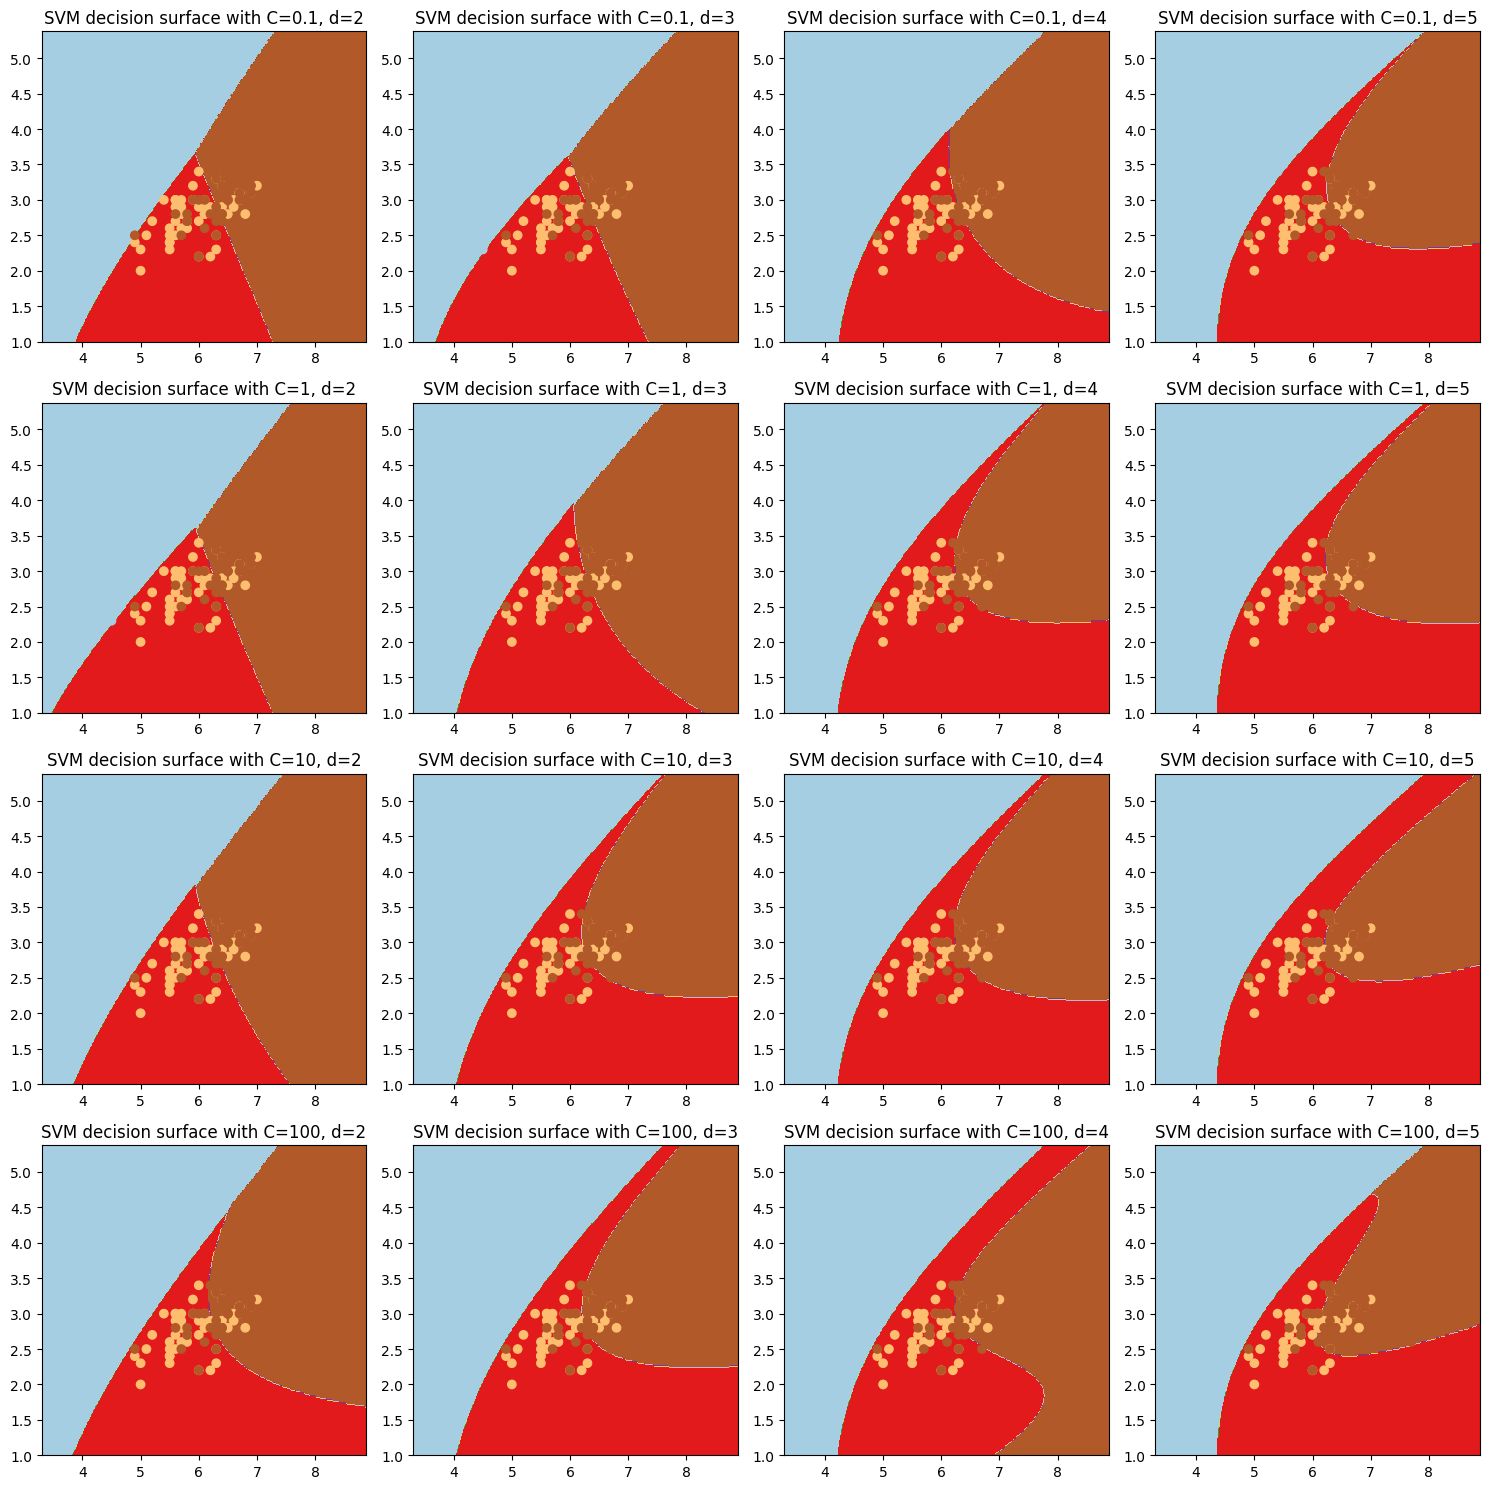

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target

# Set the range of values for C and d
C_values = [0.1, 1, 10, 100]
d_values = [2, 3, 4, 5]

# Create subplots for each combination of C and d
fig, axes = plt.subplots(len(C_values), len(d_values), figsize=(15, 15))

for i, C in enumerate(C_values):
    for j, d in enumerate(d_values):
        # create an instance of SVM with the custom polynomial kernel and train it
        print(f"Training the SVM with C={C} and d={d}")
        clf = svm.SVC(C=C, kernel='poly', degree=d)
        clf.fit(X, Y)

        # Plot the decision boundary
        xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.02),
                             np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.02))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axes[i, j].contourf(xx, yy, Z, cmap=plt.cm.Paired)

        # Plot also the training points
        axes[i, j].scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
        axes[i, j].set_title(f'SVM decision surface with C={C}, d={d}')
        axes[i, j].axis('tight')

plt.tight_layout()
plt.show()


In [11]:
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load the data
filename = 'data/svmTuningData.dat'
allData = np.loadtxt(filename, delimiter=',')
X = allData[:, :-1]
Y = allData[:, -1]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {'C': [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100],
              'gamma': [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100]}

# Create an SVM classifier with a Gaussian kernel
svm_classifier = svm.SVC(kernel='rbf')

# Use GridSearchCV to find the optimal parameters
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best parameters and their corresponding accuracy
optimal_C = grid_search.best_params_['C']
optimal_gamma = grid_search.best_params_['gamma']
optimal_accuracy = grid_search.best_score_

# Report the optimal values in the README file
# ...

# Train the SVM with the optimal parameters
final_svm_classifier = svm.SVC(kernel='rbf', C=optimal_C, gamma=optimal_gamma)
final_svm_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = final_svm_classifier.predict(X_test)

# Calculate and report the accuracy on the test set
test_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Optimal C: {optimal_C}")
print(f"Optimal gamma: {optimal_gamma}")
print(f"Test Accuracy: {test_accuracy}")


Optimal C: 60
Optimal gamma: 0.01
Test Accuracy: 0.9615384615384616
